### Import Data dan Library

In [69]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('dataKasus-1.xlsx')

### Menampilkan data

In [70]:
display(df.head())

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


### Menampilkan statistik  dasar & Tipe data

In [71]:
display(df.describe())
display(df.dtypes)

,NO,PARITAS
count,561.000000,561.000000
mean,281.859180,1.709447
std,162.301009,1.012105
min,1.000000,0.000000
25%,142.000000,1.000000
50%,282.000000,2.000000
75%,422.000000,2.000000
max,562.000000,6.000000


NO                                   int64
NAMA                                object
USIA                                object
PARITAS                              int64
JARAK KELAHIRAN                     object
RIW HIPERTENSI                      object
RIW PE                              object
OBESITAS                            object
RIW DM                              object
RIW HIPERTENSI/PE DALAM KELUARGA    object
SOSEK RENDAH                        object
PE/Non PE                           object
Unnamed: 12                         object
dtype: object

### Menghitung total nilai NULL

In [72]:
print(df.isnull().sum())

NO                                    0
NAMA                                  0
USIA                                  3
PARITAS                               0
JARAK KELAHIRAN                       7
RIW HIPERTENSI                        0
RIW PE                                0
OBESITAS                              0
RIW DM                                0
RIW HIPERTENSI/PE DALAM KELUARGA      0
SOSEK RENDAH                          0
PE/Non PE                             0
Unnamed: 12                         550
dtype: int64


## Histogram usia

220


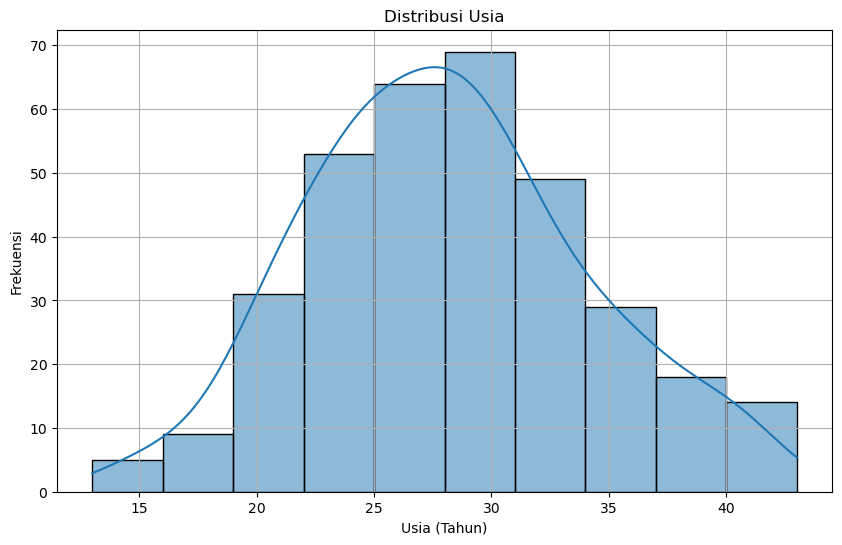

In [73]:

# Menghapus ' TH' dari kolom 'USIA' dan menghapus spasi tambahan
df['USIA'] = df['USIA'].str.replace(' TH', '').str.strip()

# Mengganti nilai yang tidak bisa dikonversi (misalnya '38 th') ke NaN
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce')

# Memeriksa apakah ada nilai NaN setelah konversi
print(df['USIA'].isnull().sum())

# Jika ada NaN, Anda bisa memutuskan untuk menghapusnya atau mengisinya
df.dropna(subset=['USIA'], inplace=True)

# Sekarang Anda dapat membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['USIA'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()




### Distribus PE/Non_PE dengan pie chart

10
313


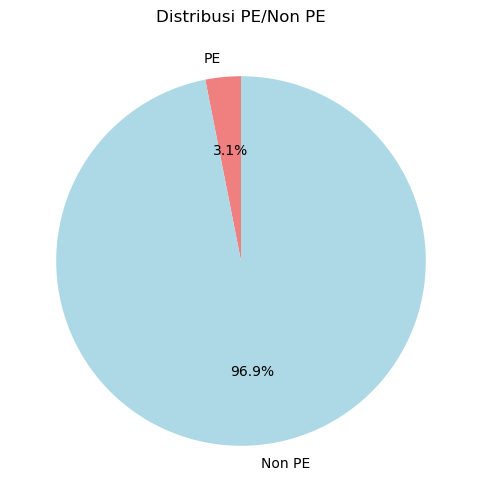

In [74]:
# Data PE/Non PE dari tabel
data_pe_non_pe = df['PE/Non PE']
data_pe_non_pe.dtype
labels = ['PE', 'Non PE']

# Menghitung jumlah PE dan Non PE
pe_count = df['PE/Non PE'].value_counts().get('PE', 0)  # Menghitung jumlah PE
non_pe_count = df['PE/Non PE'].value_counts().get('Non PE', 0)  # Menghitung jumlah Non PE
print(pe_count)
print(non_pe_count)

# Data untuk pie chart
sizes = [pe_count, non_pe_count]

# Membuat pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])

# Menambahkan judul
plt.title('Distribusi PE/Non PE')

# Menampilkan plot
plt.show()


### Korelasi antara Riwayat Hipertensi dan Obesitas

In [75]:
# Mengubah kolom 'RIW HIPERTENSI' dan 'OBESITAS' menjadi numerik
df['RIW HIPERTENSI'] = df['RIW HIPERTENSI'].apply(lambda x: 1 if x == 'Ya' else 0)
df['OBESITAS'] = df['OBESITAS'].apply(lambda x: 1 if x == 'Ya' else 0)

# Menghitung korelasi
correlation = df[['RIW HIPERTENSI', 'OBESITAS']].corr().iloc[0, 1]

print(f'Korelasi antara RIW HIPERTENSI dan OBESITAS: {correlation:.2f}')



Korelasi antara RIW HIPERTENSI dan OBESITAS: 0.12
